<center>

# Assignment 6: Image Classification

</center>


# **Jalendar Reddy Maligireddy**

# 11511290

# 1.About the model

Deep learning is a subfield of machine learning focused with simulating human brain functions in software programs by employing layers of artificial neural networks (ANN), which act in some respects similarly to the human brain.

CNN stands for Convolutional Neural Network which is a specialized neural network for processing data that has an input shape like a 2D matrix like images. CNN's are typically used for image detection and classification.

The convolutional brain organization (CNN) is a class of profound learning brain organizations. CNNs address a colossal leap forward in picture acknowledgment. They're most generally used to dissect visual symbolism and are as often as possible working in the background in picture order. They can be found at the center of all that from Facebook's photograph labeling to self-driving vehicles. They're buckling down in the background in everything from medical care to security.

They're quick and they're effective. However, how would they work?

Picture order is the most common way of taking an information (like an image) and yielding a class (like "feline") or a likelihood that the information is a specific class ("there's a 90% likelihood that this info is a feline"). You can take a gander at an image and realize that you're taking a gander at your very own horrendous shot face, however how could a PC figure out how to do that?

With a convolutional brain organization!

A CNN has

Convolutional layers
ReLU layers
Pooling layers
a Completely associated layer
An exemplary CNN engineering would look something like this:

Input - >Convolution - >ReLU - >Convolution - >ReLU - >Pooling - >
ReLU - >Convolution - >ReLU - >Pooling - >Fully Associated

A CNN convolves (not tangles… ) learned highlights with input information and utilizations 2D convolutional layers. This implies that this kind of organization is great for handling 2D pictures. Contrasted with other picture characterization calculations, CNNs really utilize very little preprocessing. This implies that they can become familiar with the channels that must be hand-made in different calculations. CNNs can be utilized in lots of uses from picture and video acknowledgment, picture arrangement, and recommender frameworks to regular language handling and clinical picture investigation.

# 2.Dataset

This is image data of Natural Scenes around the world.
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,
'forest' -> 1,
'glacier' -> 2,
'mountain' -> 3,
'sea' -> 4,
'street' -> 5 }

The Train, Test and Prediction data are separated in zip files. There are around 14k images in Train, 3k in Test, and 7k in Prediction.

Importing the required packages

In [1]:
import pandas as pd
from pathlib import Path
import cv2
from PIL import Image
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models

In [3]:
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, load_model, Model
import matplotlib.gridspec as gridspec
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
import tensorflow as tf
from tensorflow.keras import optimizers

In [4]:
from zipfile import ZipFile

# 3.Data pre-processing

Reading the images and resizing it ti 150*150.
returning with images & their category.

In [21]:
def read_img(dataset_dir, image_directories):
    images=[]
    classes =[]
    if len(image_directories)!=0:
      for img_dir in image_directories:
          for path in Path(dataset_dir+'/'+img_dir).iterdir():
              if path.name.endswith('.jpg'):
                      img = cv2.imread(str(path))
                      img = cv2.resize(img,(150,150))  
                      images.append(img)
                      classes.append(img_dir)
    elif len(image_directories) == 0:
      for path in Path(dataset_dir).iterdir():
              if path.name.endswith('.jpg'):
                      img = cv2.imread(str(path))
                      img = cv2.resize(img,(150,150))  
                      images.append(img)
    return images, classes

showing the images

In [22]:
#function to display images
def display_images(images, classes, rows, columns):
    plt.subplots_adjust(0,0,3,3)
    for i in range(0,rows*columns):
        random_number = randint(0, len(train_images))
        img = images[random_number]
        plt.subplot(rows,columns,i+1)
        plt.title(classes[random_number])
        plt.axis('off')
        plt.imshow(img)

My label encoder

In [23]:
def my_label_encoder(classes):
  class_dict ={'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
  labels = [class_dict[item] for item in classes]
  return labels

My label dencoder

In [24]:
def my_label_decoder(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain', 6:'unknown'}
    return labels[class_code]

unzipping the files

In [25]:
def unzipfile(zipfile):
  with ZipFile(zipfile, 'r') as zipObj:
    zipObj.extractall()

set early stopping criteria

this is the number of epochs with no improvment after which the training will stop

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

define the model checkpoint callback -> this will keep on saving the model as a physical file

In [27]:
model_checkpoint = ModelCheckpoint('fas_mnist_1.h5', verbose=1, save_best_only=True)

the cross validation function which fit the model and epochs=20

In [28]:
def n_fold_cross_validator(n_folds, X, y, model):
  model_history = []
  for i in range(n_folds):
      print("Training on Fold: ",i+1)
      model_history.append(model.fit(X, y, epochs=20, callbacks=[early_stopping],
              verbose=1, validation_split=0.1))
      print("======="*12, end="\n\n\n")

  return model_history

creating a list of category

In [29]:
image_directories = ['buildings','forest','glacier','mountain','sea','street']
train_directory = 'seg_train'

unzipping training file

In [30]:
unzipfile('seg_train.zip')

Reading images in training set

In [31]:
train_images, train_classes = read_img('/content/seg_train/seg_train', image_directories)

convert list of images to numpy array

In [32]:
train_images = np.array(train_images)
train_classes = np.array(train_classes)

# 4.Data visualizations

getting the shape of images and labels

In [33]:
print('Shape of Images:', train_images.shape)
print('Shape of Classes:', train_classes.shape)

Shape of Images: (14034, 150, 150, 3)
Shape of Classes: (14034,)


Display 25 random images from training set

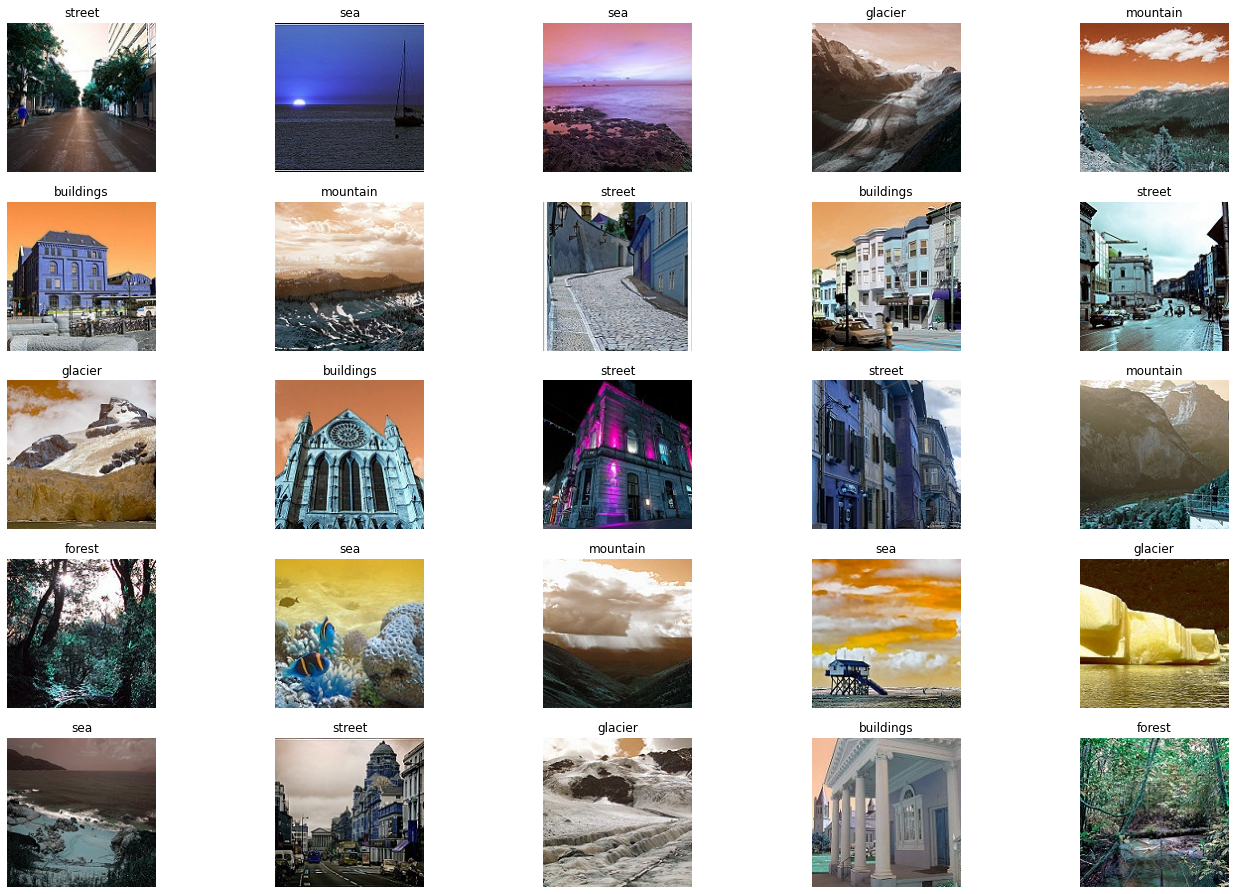

In [34]:
display_images(train_images, train_classes, 5, 5)

**4. Developing CNN model**

**Activation capacity (Relu)**: The enactment work is the nonlinear change that we do over the information signal. This changed result is then shipped off the following layer of neurons as information.

I have utilized "ReLU" (Redressed Straight Unit) as my enactment work. Probably the best benefit ReLU has over other initiation capacities is that it doesn't actuate all neurons simultaneously. This makes it exceptionally computational productive as couple of neurons are actuated per time. It doesn't immerse at the positive area. By and by, ReLU merges multiple times quicker than tanh and sigmoid enactment capacities.

In [35]:
train_labels = my_label_encoder(train_classes)
train_labels = np.array(train_labels)

**Pooling capacity (MaxPool2D):** I have involved MaxPool2d work as my pooling capacity. Down examples the information portrayal by taking the most extreme worth over the window characterized by pool size for each aspect along the component's hub. The window is moved by steps in each aspect. The subsequent result while utilizing "substantial" cushioning choice has a shape (number of lines or sections) of: output_shape = (input_shape - pool_size + 1)/steps)

**Filter function (Conv2D):**  The most well-known sort of convolution that is utilized is the 2D convolution layer, and is generally curtailed as conv2D. A channel or a part in a conv2D layer has a level and a width. They are by and large more modest than the info picture thus we get them across the entire picture. The region where the channel is on the picture is known as the open field.

Conv2D channels stretch out through the three directs in a picture (Red, Green, and Blue). The channels might be different for each channel as well. After the convolutions are performed exclusively for each channel, they are amounted to get the last tangled picture. The result of a channel after a convolution activity is known as a component map.

Developing CNN model for Image classification

In [36]:
model=Models.Sequential()

model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 200)     5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 180)     324180    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 180)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 27, 27, 180)       291780    
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 140)       226940    
                                                                 
 conv2d_4 (Conv2D)           (None, 23, 23, 100)       126100    
                                                        

# 5.Applying the model

In 10-overlay cross approval the CNN model is prepared in 10 layers. In each layer the model exactness and approval precision are recorded and put away in a rundown. The train information is parted into train and approval set. The approval information is 10% of the train information.

In each layer the preparation will be halted after 2 nonstop ages where the approval misfortune isn't moved along. At last, the aftereffects of cross approval are envisioned.

In [ ]:
model_history = n_fold_cross_validator(10, train_images, train_labels, model)

Training on Fold:  1
Epoch 1/20
395/395 [==============================] - 130s 236ms/step - loss: 1.7019 - accuracy: 0.3443 - val_loss: 1.9045 - val_accuracy: 0.0997
Epoch 2/20
395/395 [==============================] - 90s 228ms/step - loss: 1.1643 - accuracy: 0.5522 - val_loss: 1.2237 - val_accuracy: 0.4131
Epoch 3/20
395/395 [==============================] - 91s 231ms/step - loss: 0.9530 - accuracy: 0.6515 - val_loss: 1.5259 - val_accuracy: 0.5484
Epoch 4/20
395/395 [==============================] - 92s 234ms/step - loss: 0.8553 - accuracy: 0.7001 - val_loss: 0.8807 - val_accuracy: 0.6766
Epoch 5/20
395/395 [==============================] - 93s 235ms/step - loss: 0.7504 - accuracy: 0.7364 - val_loss: 0.9926 - val_accuracy: 0.6090
Epoch 6/20
395/395 [==============================] - 93s 235ms/step - loss: 0.6694 - accuracy: 0.7663 - val_loss: 1.2653 - val_accuracy: 0.5335
Epoch 00006: early stopping


Training on Fold:  2
Epoch 1/20
395/395 [==============================] - 93s

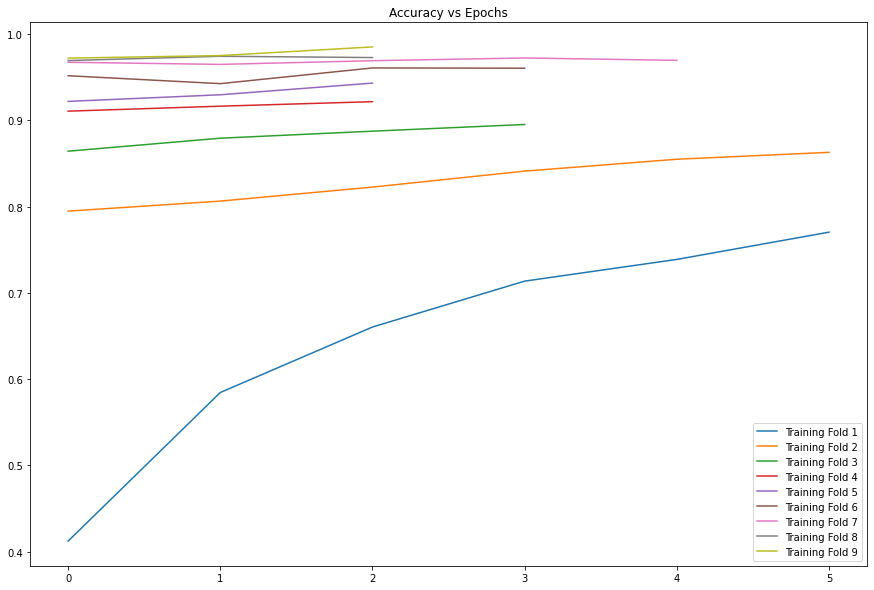

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Accuracy vs Epochs')
# plot_labels = 'Training Fold ' + i+1
for i in range(0,9):
  plt.plot(model_history[i].history['accuracy'], label='Training Fold '+str(i+1))

plt.legend() 
plt.show()

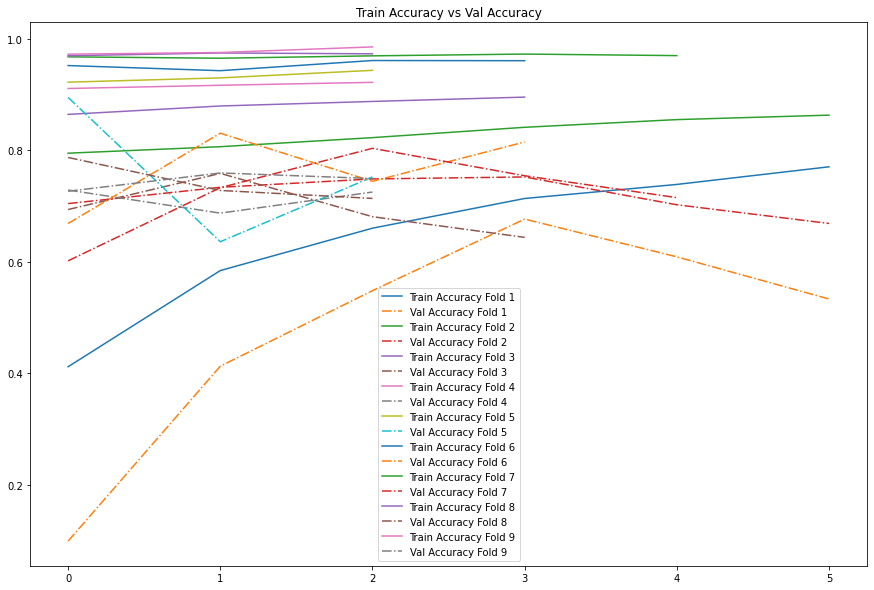

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Train Accuracy vs Val Accuracy')
for i in range(0,9):
  plt.plot(model_history[i].history['accuracy'], label='Train Accuracy Fold '+str(i+1))
  plt.plot(model_history[i].history['val_accuracy'], label='Val Accuracy Fold '+str(i+1), linestyle = "dashdot")
plt.legend()
plt.show()

# 6.Validating with test data

In [40]:
# Now let us check model accuracy with test data

# Read test images and labels
unzipfile('seg_test.zip')
test_images, test_classes= read_img('/content/seg_test/seg_test', image_directories)

In [41]:
# convert test  images to numpy array
test_images = np.array(test_images)
test_classes = np.array(test_classes)

In [42]:
# We will check shape of images and labels
print('Shape of Images:', test_images.shape)
print('Shape of Classes:', test_classes.shape)

Shape of Images: (3000, 150, 150, 3)
Shape of Classes: (3000,)


In [43]:
# Label encoding for test classes
test_labels = my_label_encoder(test_classes)
test_labels = np.array(test_labels)

Load the model that was saved by ModelCheckpoint


model = load_model('fas_mnist_1.h5')

In [ ]:
model.evaluate(test_images, test_labels)

94/94 [==============================] - 9s 94ms/step - loss: 1.1157 - accuracy: 0.8473


[1.1156854629516602, 0.8473333120346069]

# 7.Prediction results and test scores

**6. Predciting the labels for new images**

In [44]:
# Read Prediction images
unzipfile('seg_pred.zip')
pred_images, no_labels = read_img('/content/seg_pred/seg_pred', [])

In [45]:
pred_images = np.array(pred_images)
pred_images.shape

(7301, 150, 150, 3)

In [46]:
def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 0:'buildings', 1:'forest', 5:'street', 3:'mountain'}
    return labels[class_code]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


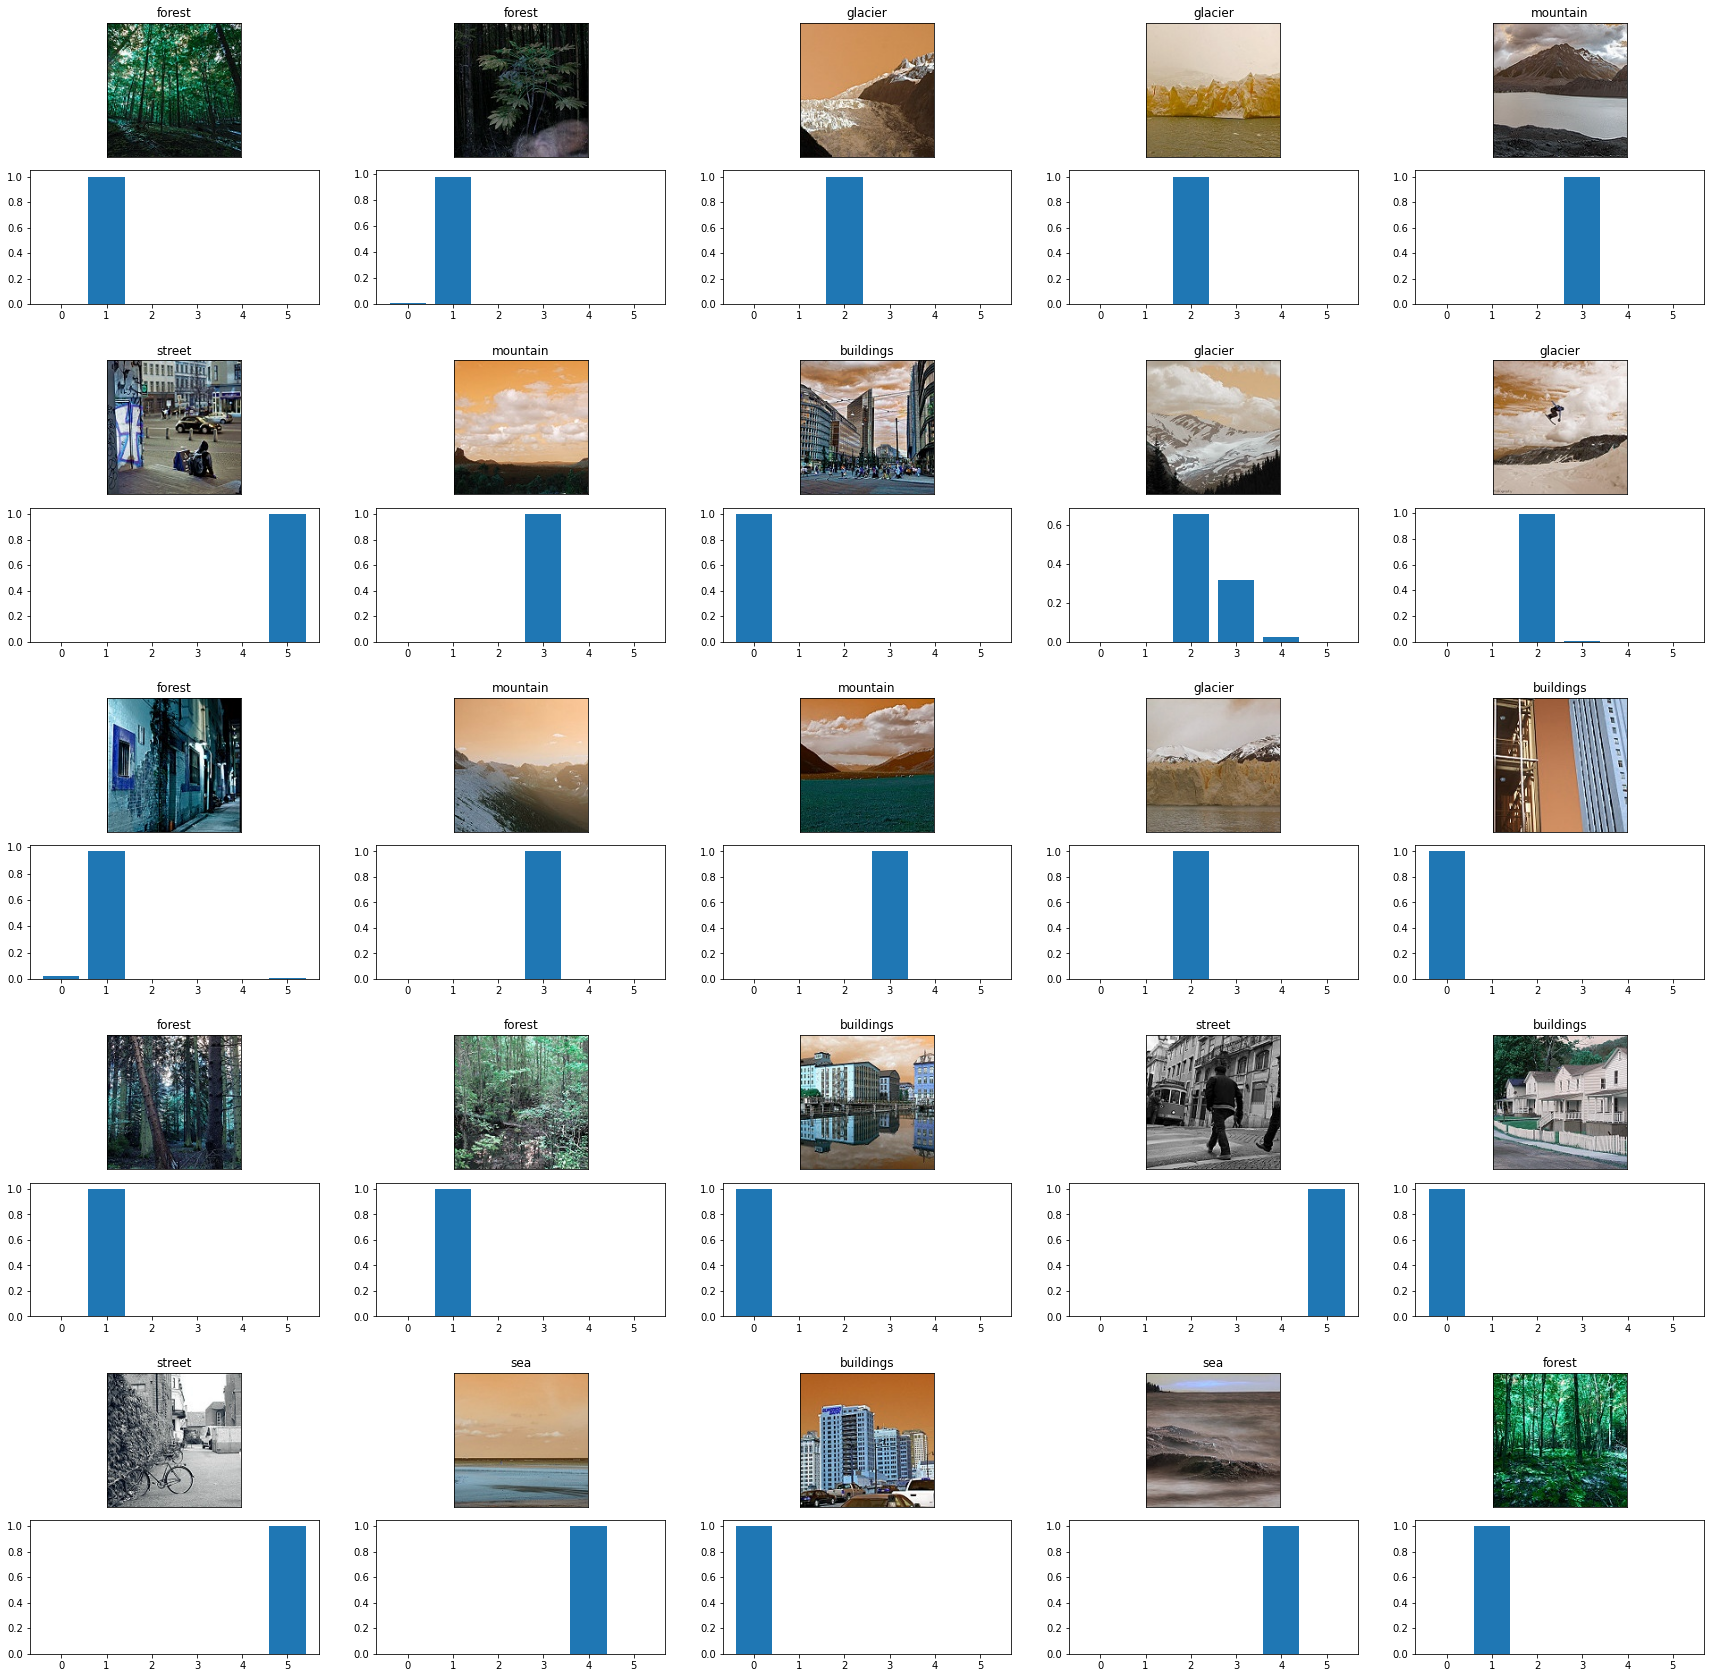

In [ ]:
# visualize the predicted classes along with the images.
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    # print(pred_class)
    pred_prob = model.predict(pred_image).reshape(6)
    # print(pred_prob)
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plt.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

# 8.Metrics

In [ ]:
predictions = model.predict(test_images) 

In [ ]:
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn

### Heatmap

A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

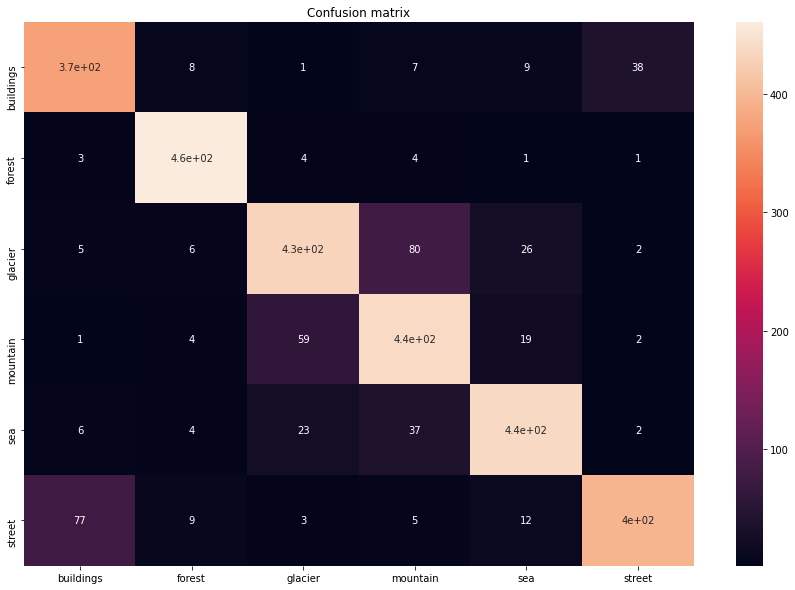

In [ ]:
CM = confusion_matrix(test_labels, pred_labels)
fig, ax = plt.subplots(figsize =(15,10))
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=image_directories, 
           yticklabels=image_directories, ax = ax)
ax.set_title('Confusion matrix')
plt.show()

In [ ]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']

def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

### Transfer learning process

VGG (visual Graphic group) is used as other model

In [ ]:
datagen = ImageDataGenerator(rescale=1/255.,
                            horizontal_flip=True,
                            width_shift_range=0.1,
                            height_shift_range=0.1)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
#defining the data generators
from tensorflow.keras.preprocessing.image import ImageDataGenerator

d_input_shape = (150,150)
batch_size = 16
traingen = datagen.flow_from_directory('/content/seg_train/seg_train',
                                      target_size = d_input_shape,
                                      class_mode='categorical',
                                      batch_size=batch_size,
                                      shuffle=False)

testgen = test_datagen.flow_from_directory('/content/seg_test/seg_test',
                                      target_size = d_input_shape,
                                      class_mode='categorical',
                                      batch_size=batch_size,
                                      shuffle=False)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [ ]:
model = Sequential()
L2 = tf.keras.regularizers.l2(0.001)
input_shape = (150,150,3)


model = tf.keras.applications.VGG19(include_top=False, input_shape=input_shape)
for layer in model.layers:
    layer.trainable=False
flat = Flatten()(model.layers[-1].output)
hidden1 = Dense(128,activation='relu')(flat)
output = Dense(6,activation='softmax')(hidden1)

model = Model(inputs=model.inputs, outputs=output)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer= optimizers.Adam(0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(traingen,
                   epochs=10,
                   validation_data = testgen, )

Epoch 1/10
878/878 [==============================] - 104s 118ms/step - loss: 1.3438 - accuracy: 0.5733 - val_loss: 0.4440 - val_accuracy: 0.8393
Epoch 2/10
878/878 [==============================] - 93s 106ms/step - loss: 0.5176 - accuracy: 0.8024 - val_loss: 0.3938 - val_accuracy: 0.8540
Epoch 3/10
878/878 [==============================] - 94s 107ms/step - loss: 0.4460 - accuracy: 0.8300 - val_loss: 0.4900 - val_accuracy: 0.8113
Epoch 4/10
878/878 [==============================] - 94s 107ms/step - loss: 0.4076 - accuracy: 0.8467 - val_loss: 0.3648 - val_accuracy: 0.8630
Epoch 5/10
878/878 [==============================] - 94s 106ms/step - loss: 0.4063 - accuracy: 0.8433 - val_loss: 0.4041 - val_accuracy: 0.8520
Epoch 6/10
878/878 [==============================] - 93s 106ms/step - loss: 0.3882 - accuracy: 0.8542 - val_loss: 0.3793 - val_accuracy: 0.8527
Epoch 7/10
878/878 [==============================] - 94s 107ms/step - loss: 0.3842 - accuracy: 0.8499 - val_loss: 0.3896 - val_a

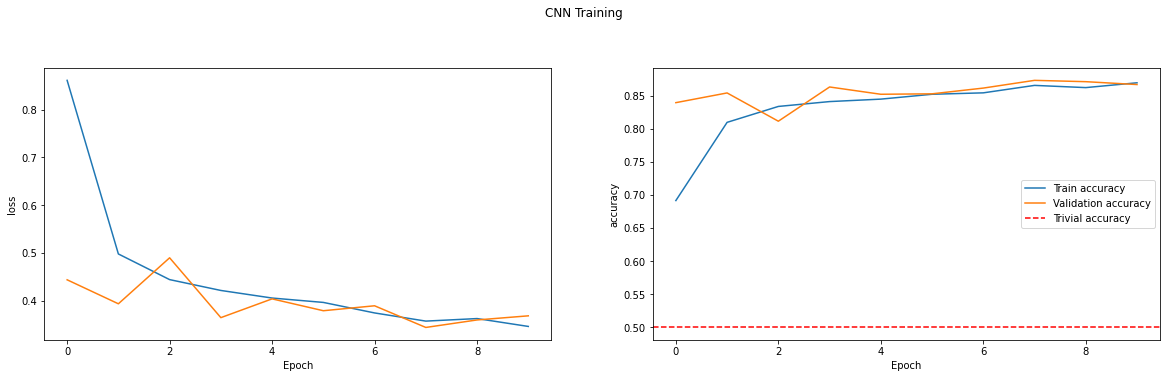

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
for i, metric in enumerate(['loss', 'accuracy']): 
    ax[i].plot(history.history[metric], label=('Train '+metric))
    ax[i].plot(history.history['val_'+metric], label='Validation '+metric)
    if metric == 'accuracy': ax[i].axhline(0.5, c='r', ls='--', label='Trivial accuracy')
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel(metric)
plt.suptitle('CNN Training', y=1.05)
plt.legend()

# 9. Conclusion

In [ ]:
metric = model.evaluate(testgen)
print(f'The Loss of evluation is: {metric[0]}')
print(f'The Accuracy of evluation is: {metric[1]:.2%}')

188/188 [==============================] - 8s 44ms/step - loss: 0.3686 - accuracy: 0.8667
The Loss of evluation is: 0.36861076951026917
The Accuracy of evluation is: 86.67%


The CNN model have almost same accuracy. the predicted the image categories up to 86% & 14% is incorrect

The Transfer learning model have almost same accuracy. the predicted the image categories up to 86%  & remaing data is incorrect.